In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
sb.set()

In [2]:
df = pd.read_csv('train.csv')

# Fix weird y/n values
df["CentralAir"] = df["CentralAir"].map(dict(Y=1, N=0))

In [28]:
def pred(data, col, depth):
    x = pd.DataFrame(data[col])
    y = pd.DataFrame(data['CentralAir'])
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)
    
    # Joint dataframe
    depth2 = DecisionTreeClassifier(max_depth = depth)
    depth2.fit(x_train, y_train)
    
    # Predict Legendary values corresponding to Total
    y_train_pred = depth2.predict(x_train)
    y_test_pred = depth2.predict(x_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", depth2.score(x_train, y_train))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", depth2.score(x_test, y_test))
    print()
    
    # Plot the Confusion Matrix for Train and Test
    train_m = confusion_matrix(y_train, y_train_pred)
    test_m = confusion_matrix(y_test, y_test_pred)
    
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(train_m, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(test_m, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
    plt.show()

    # Calculate TPR and FPR
    TP = train_m[1][1]
    FP = train_m[0][1]
    TN = train_m[0][0]
    FN = train_m[1][0]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    print("True Positive Rate (TPR):", TPR)
    print("False Positive Rate (FPR):", FPR)
    
    plt.figure(figsize=(12, 12))
    plot_tree(depth2, filled=True, rounded=True, 
          feature_names=[col], 
          class_names=["CentralAirY","CentralAirN"])
    plt.show()


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9434931506849316

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9315068493150684



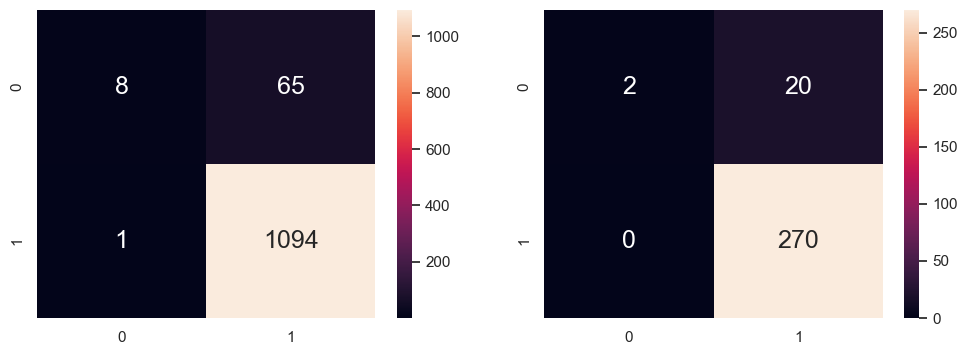

True Positive Rate (TPR): 0.9990867579908675
False Positive Rate (FPR): 0.8904109589041096


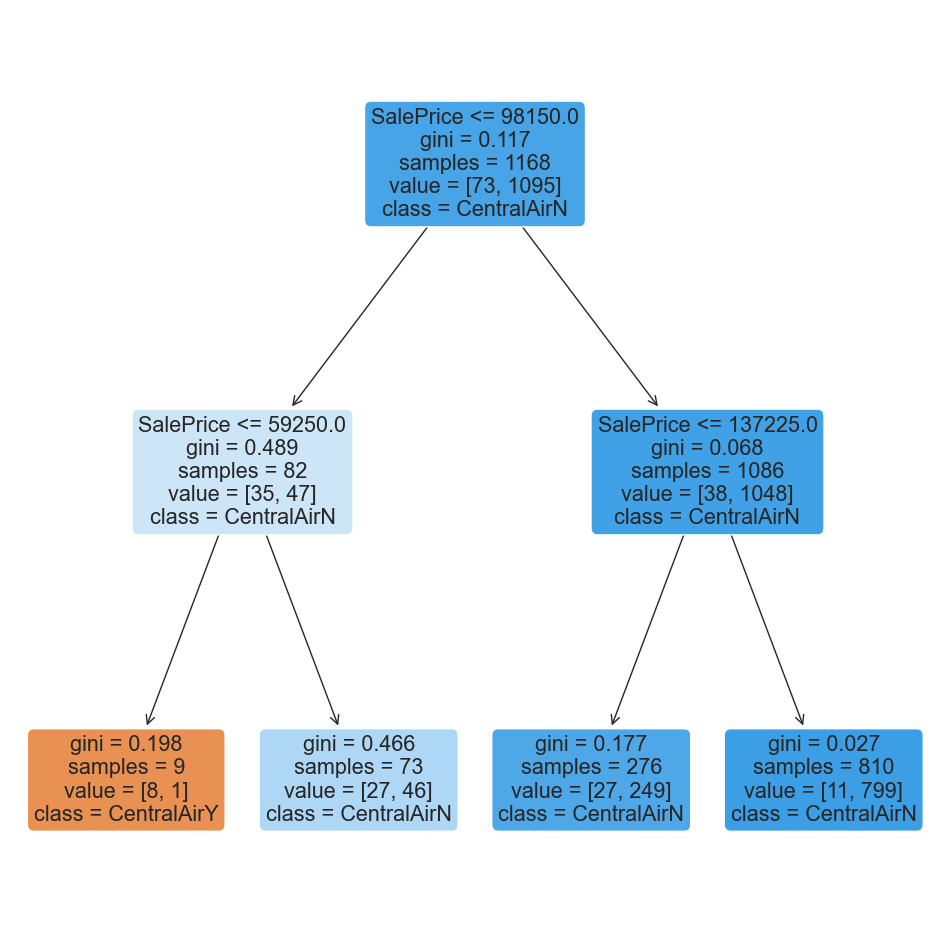

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9452054794520548

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.934931506849315



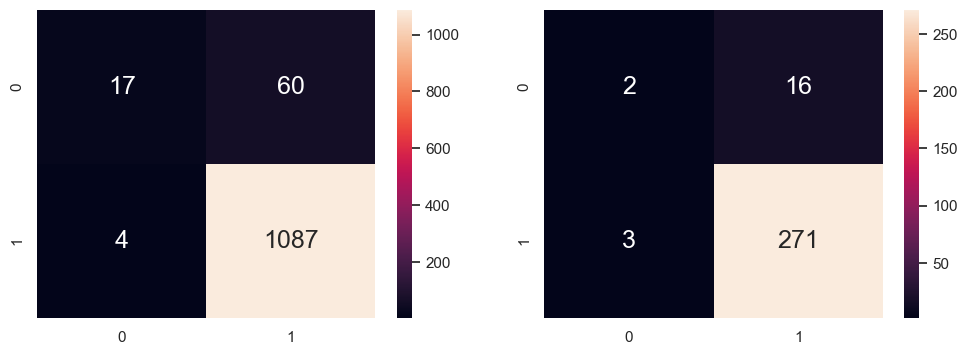

True Positive Rate (TPR): 0.9963336388634281
False Positive Rate (FPR): 0.7792207792207793


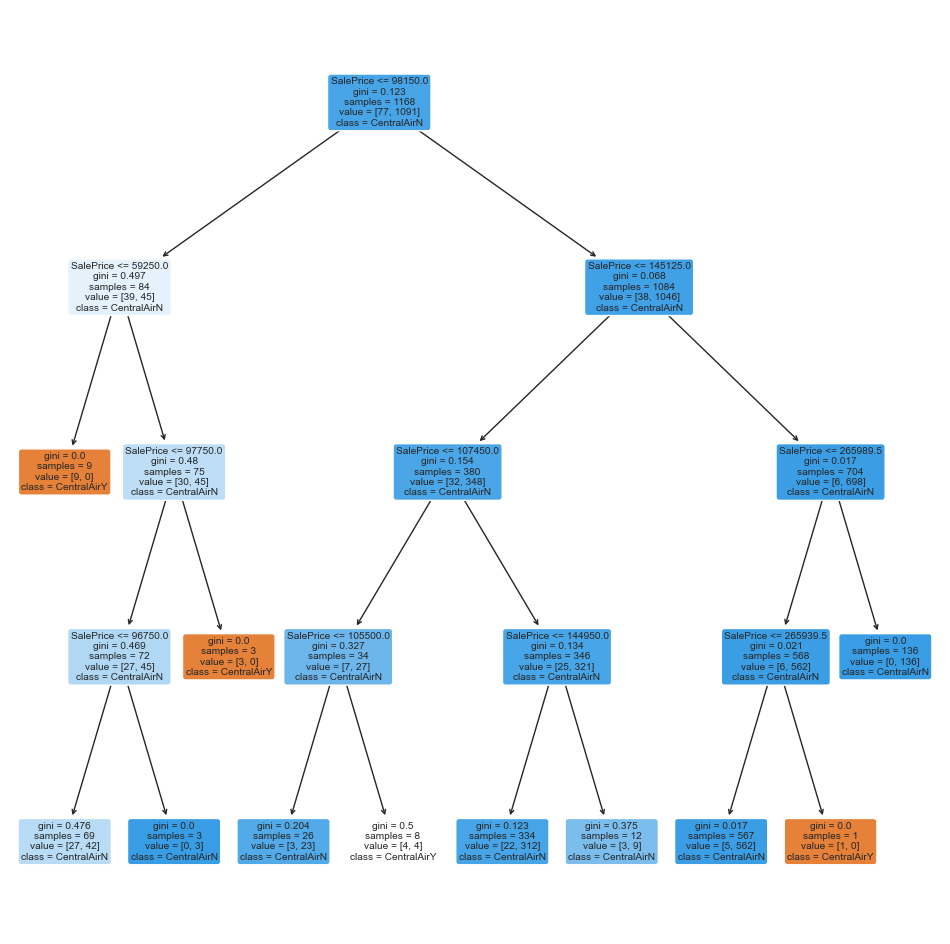

In [29]:
# Q1
# Model 1 has a lower goodness of fit but a higher TPR and lower FPR 
# than model 2

pred(df, "SalePrice", depth=2)
pred(df, "SalePrice", depth=4)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9366438356164384

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.952054794520548



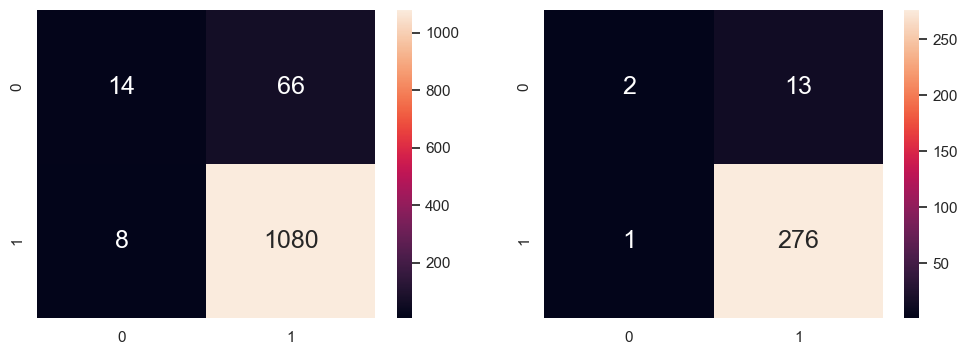

True Positive Rate (TPR): 0.9926470588235294
False Positive Rate (FPR): 0.825


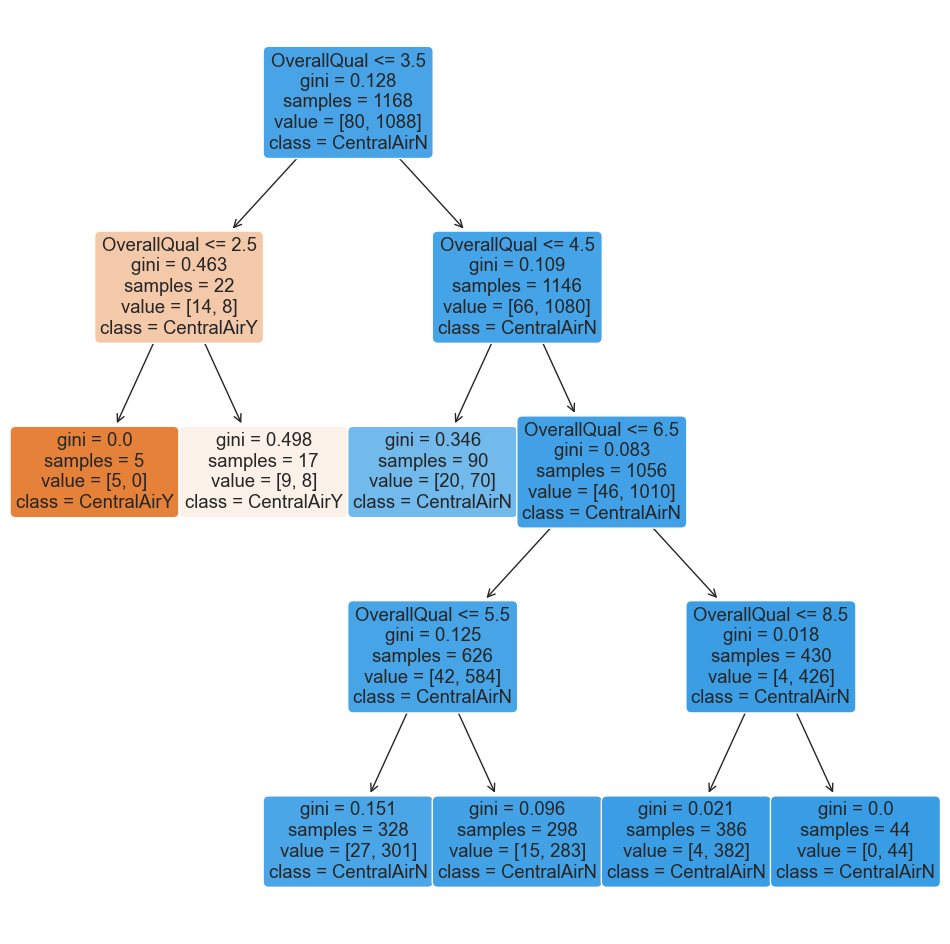

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.934931506849315

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.934931506849315



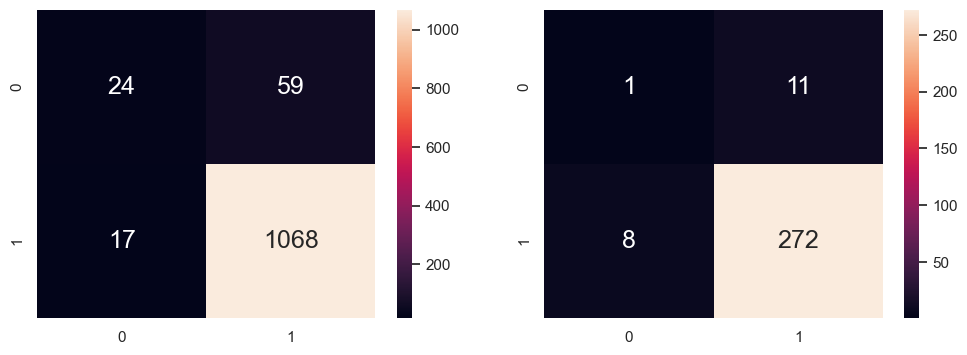

True Positive Rate (TPR): 0.9843317972350231
False Positive Rate (FPR): 0.7108433734939759


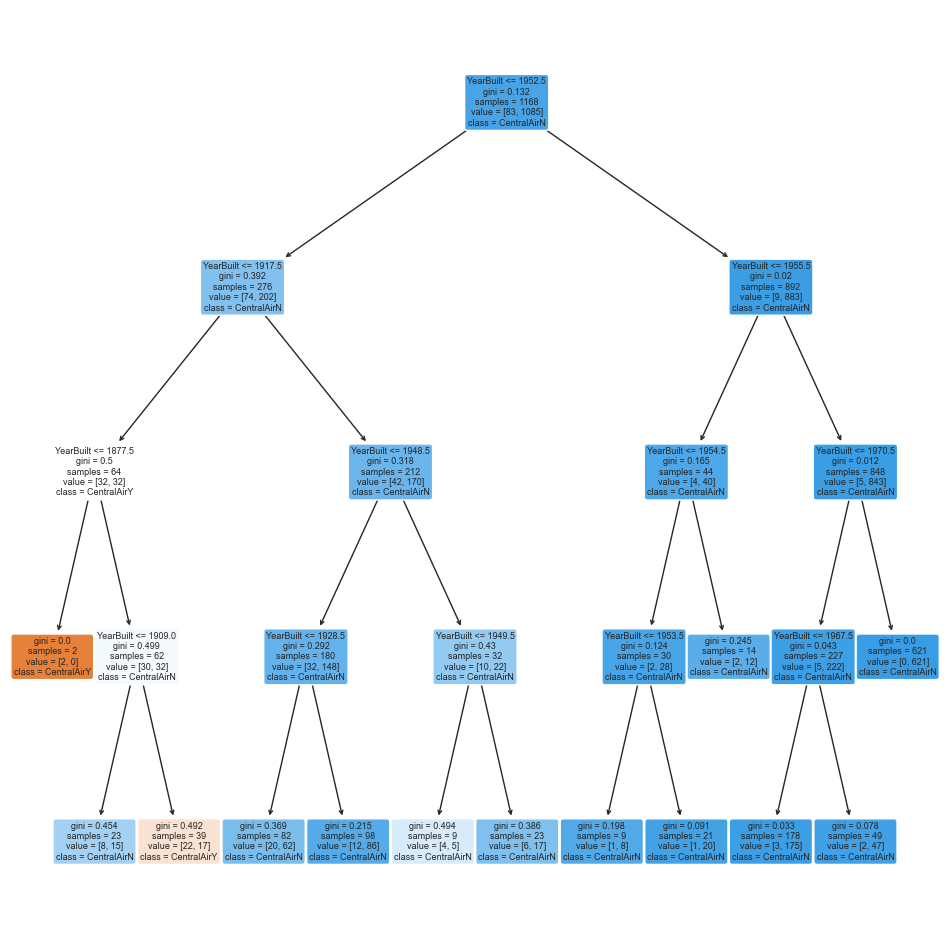

In [30]:
# Q2
# OverallQual has a higher goodness of fit and a higher TPR,
# but it also has a higher FPR as well.

pred(df, "OverallQual", depth=4)
pred(df, "YearBuilt", depth=4)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9426369863013698

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9486301369863014



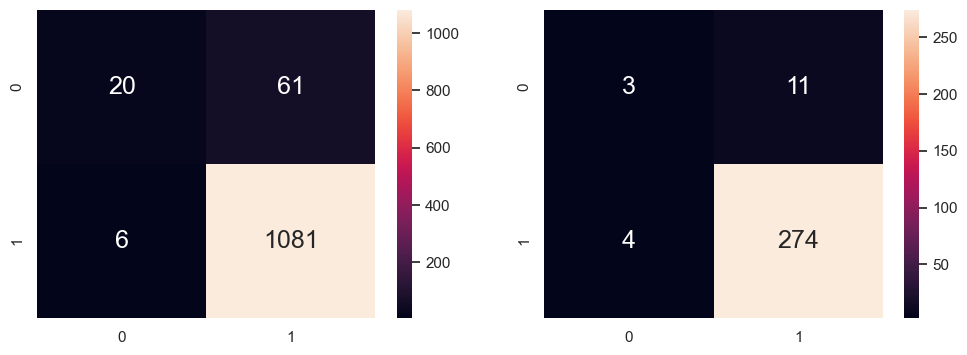

True Positive Rate (TPR): 0.9944802207911684
False Positive Rate (FPR): 0.7530864197530864


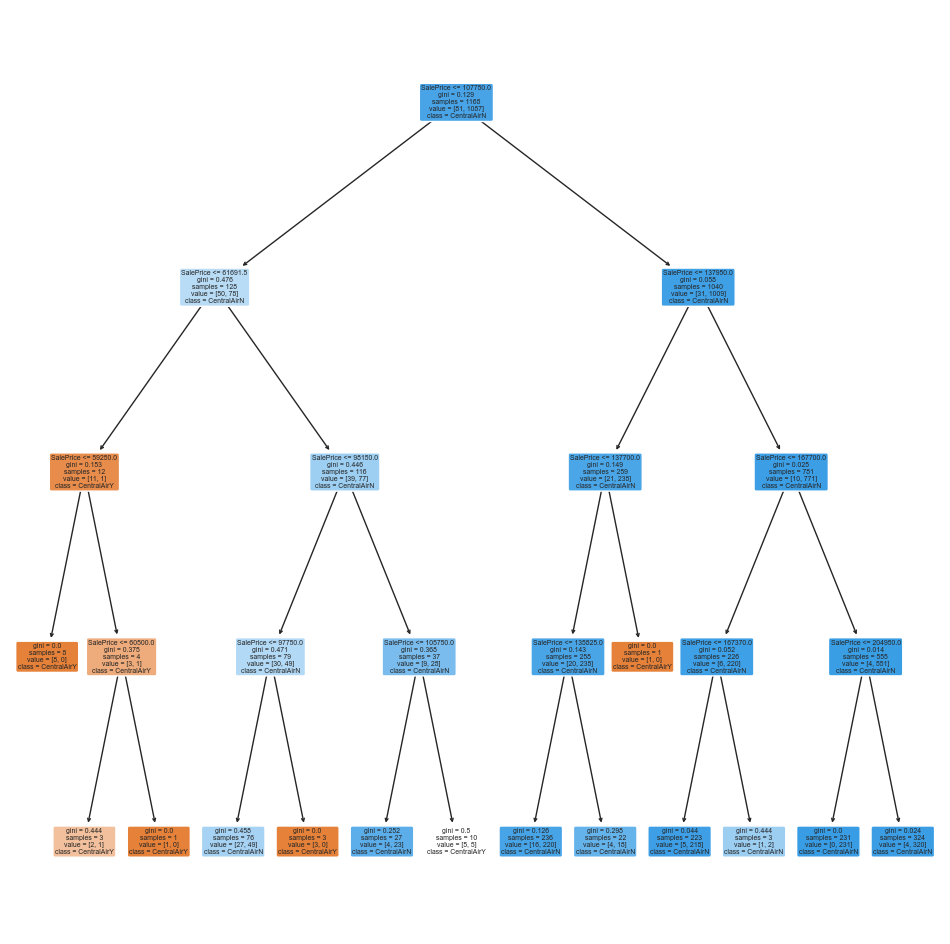

In [43]:
# Q3
pred(df, "SalePrice", depth=4)

In [49]:
# Answering based on model in part 1a, the node with the most FP's:
# node with 105500<SalePrice<=107450

df[['SalePrice','CentralAir']][(df['SalePrice']>105500) & (df['SalePrice']<=107450) & (df['CentralAir']==0)]

,SalePrice,CentralAir
74,107400,0
217,107000,0
520,106250,0
809,106000,0
896,106500,0
